### STRIP ZIP CODE JOIN AT BOTTOM OF PAGE

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from time import time
%matplotlib inline
import seaborn as sns
import os
import math
import string

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
cd Data

/Users/Shalu/Dropbox/Coursework/DS/Kaggle LC/Data


In [9]:
df.columns

Index([u'loan_amnt', u'term', u'int_rate', u'grade', u'sub_grade', u'emp_title', u'emp_length', u'home_ownership', u'annual_inc', u'verification_status', u'loan_status', u'purpose', u'zip_code', u'addr_state', u'dti', u'delinq_2yrs', u'earliest_cr_line', u'inq_last_6mths', u'open_acc', u'pub_rec', u'revol_bal', u'revol_util', u'initial_list_status', u'collections_12_mths_ex_med', u'mort_acc', u'loan_label', u'emp_title_flag', u'fico_avg'], dtype='object')

In [6]:
df = pd.read_pickle('df_emp_1020.p')

In [232]:
test = df[((~(df.loan_amnt.isnull()))&df.loan_label==1)]

In [264]:
test['loan_range'] = pd.cut(df.loan_amnt,10)

In [268]:
test.columns

Index([u'loan_amnt', u'term', u'int_rate', u'grade', u'sub_grade', u'emp_title', u'emp_length', u'home_ownership', u'annual_inc', u'verification_status', u'loan_status', u'purpose', u'zip_code', u'addr_state', u'dti', u'delinq_2yrs', u'earliest_cr_line', u'inq_last_6mths', u'open_acc', u'pub_rec', u'revol_bal', u'revol_util', u'initial_list_status', u'collections_12_mths_ex_med', u'mort_acc', u'loan_label', u'emp_title_flag', u'fico_avg', u'loan_range'], dtype='object')

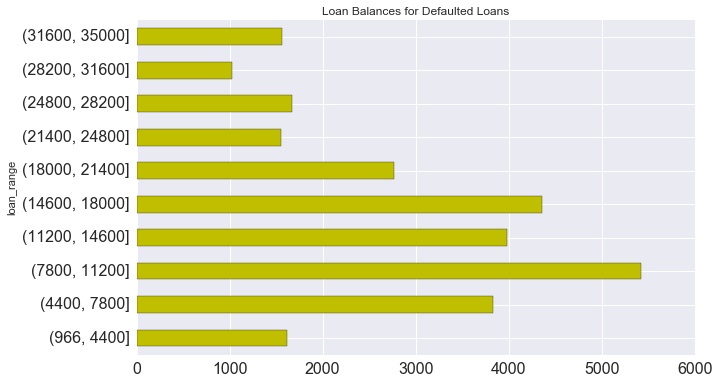

In [266]:
plt.title('Loan Balances for Defaulted Loans')
((test.groupby(['loan_range']).loan_label.apply(lambda x: pd.value_counts(x))).unstack()[1]).plot(kind='barh', figsize=(10,6), color='y', fontsize=16)

In [ ]:
#df.groupby(["emp_title_flag"]).loan_label.apply(lambda x: pd.value_counts(x)/x.count().astype(float))
(df.loan_amnt[df.loan_label==1])
#df[['loan_amnt', 'loan_label']]
#pd.cut(df.loan_amnt,10)
#df.loan_amnt[df.loan_label==1]

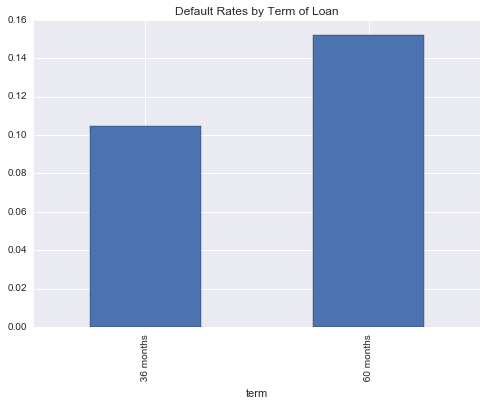

In [291]:
plt.title('Default Rates by Term of Loan')
((df.groupby(["term"]).loan_label.apply(lambda x: pd.value_counts(x)/x.count().astype(float))).unstack()[1]).plot.bar()

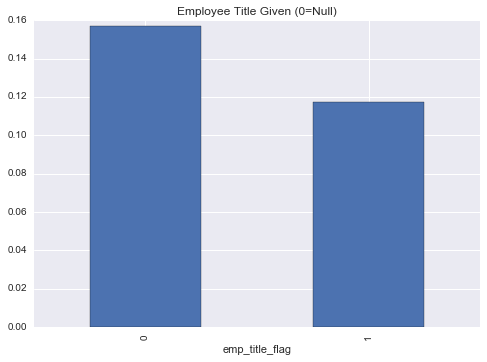

In [194]:
plt.title('Employee Title Given (0=Null)')
((df.groupby(['emp_title_flag']).loan_label.apply(lambda x: pd.value_counts(x)/x.count().astype(float))).unstack()[1]).plot.bar()

In [85]:
group_grade = df.groupby(["grade"]).loan_label.apply(lambda x: pd.value_counts(x)/x.count().astype(float))
grade_plot = pd.DataFrame(group_grade.unstack()[1], columns={1:'def_rate'})

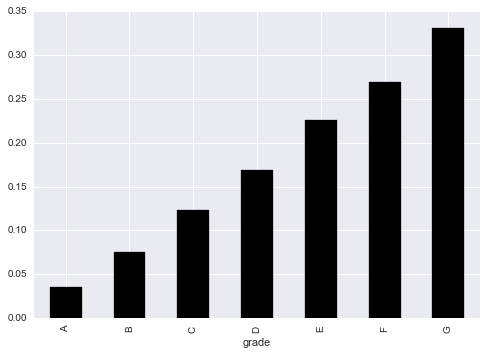

In [119]:
grade_plot.plot.bar(color='k', legend=False)

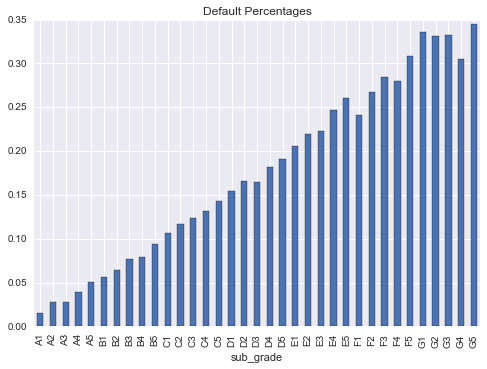

In [113]:
plt.title('Default Percentages')
((df.groupby(['sub_grade']).loan_label.apply(lambda x: pd.value_counts(x)/x.count().astype(float))).unstack()[1]).plot.bar()

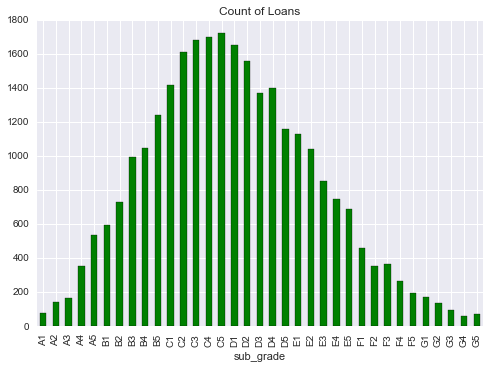

In [114]:
plt.title('Count of Loans')
((df.groupby(['sub_grade']).loan_label.apply(lambda x: pd.value_counts(x).astype(int))).unstack()[1]).plot.bar(color='g')

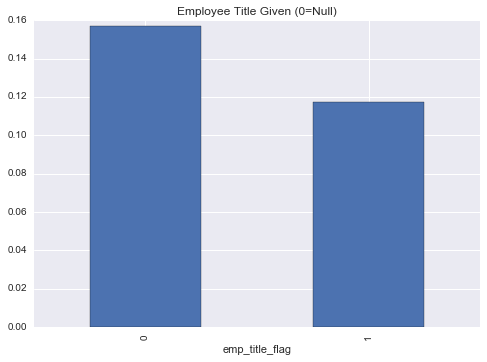

In [292]:
plt.title('Employee Title Given (0=Null)')
((df.groupby(['emp_title_flag']).loan_label.apply(lambda x: pd.value_counts(x)/x.count().astype(float))).unstack()[1]).plot.bar()

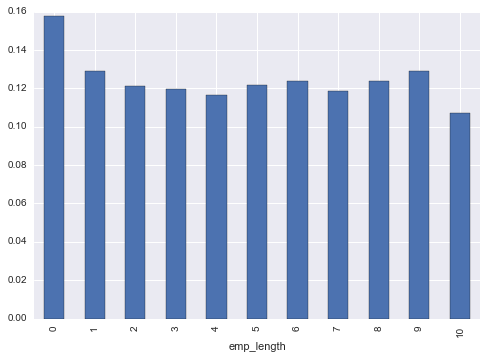

In [136]:
((df.groupby(["emp_length"]).loan_label.apply(lambda x: pd.value_counts(x)/x.count().astype(float))).unstack()[1]).plot.bar()

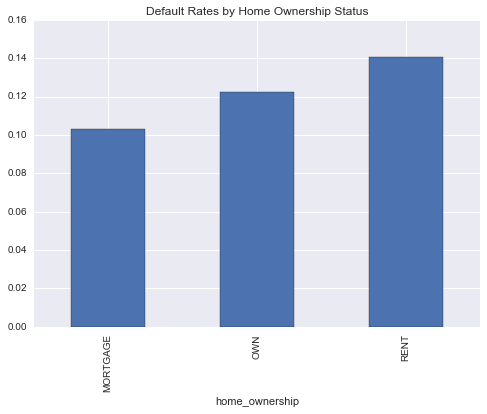

In [294]:
plt.title('Default Rates by Home Ownership Status')
((df.groupby(["home_ownership"]).loan_label.apply(lambda x: pd.value_counts(x)/x.count().astype(float))).unstack()[1]).plot.bar()

In [340]:
bins=[0,25000,50000,75000,100000,150000,200000,250000,10000000]
test = df[df.loan_label==1].copy()
test['inc_range'] = pd.cut(test.annual_inc, bins=bins)

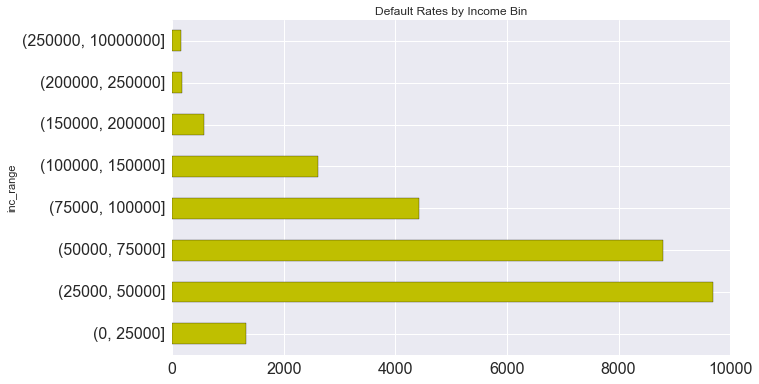

In [344]:
#((test.groupby(["inc_range"]).loan_label.apply(lambda x: pd.value_counts(x))).unstack()[1])
plt.title('Default Rates by Income Bin')
((test.groupby(["inc_range"]).loan_label.apply(lambda x: pd.value_counts(x))).unstack()[1]).plot(kind='barh', figsize=(10,6), color='y', fontsize=16)

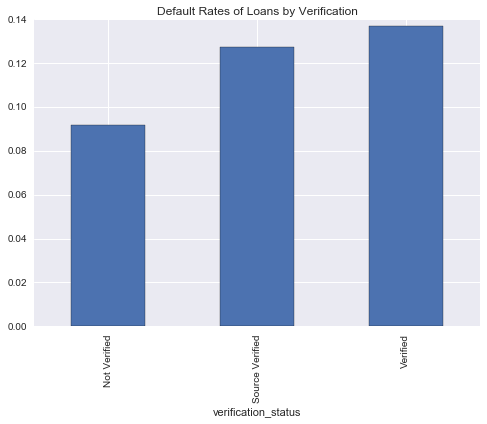

In [346]:
plt.title('Default Rates of Loans by Verification')
((df.groupby(["verification_status"]).loan_label.apply(lambda x: pd.value_counts(x)/x.count().astype(float))).unstack()[1]).plot.bar()

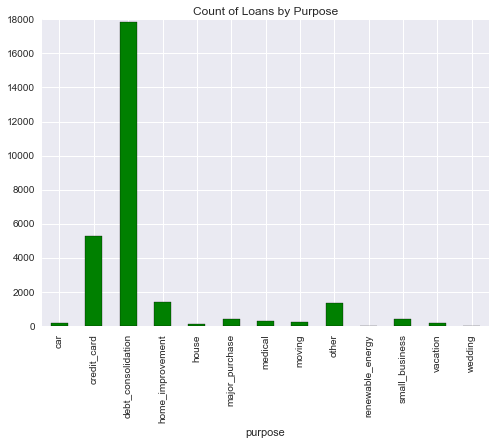

In [288]:
plt.title('Count of Loans by Purpose')
((df.groupby(["purpose"]).loan_label.apply(lambda x: pd.value_counts(x).astype(float))).unstack()[1]).plot.bar(color='g')

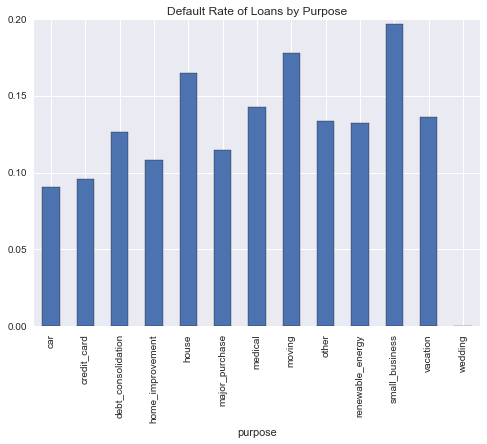

In [289]:
plt.title('Default Rate of Loans by Purpose')
((df.groupby(["purpose"]).loan_label.apply(lambda x: pd.value_counts(x)/x.count().astype(float))).unstack()[1]).plot.bar()

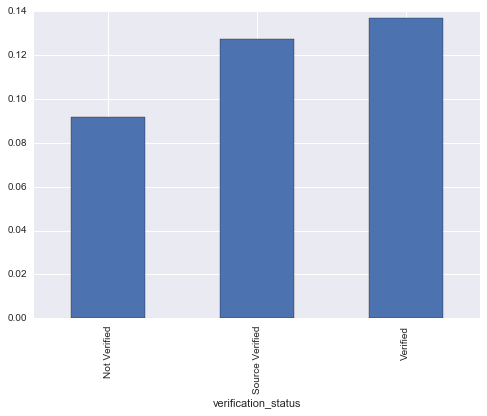

In [171]:
((df.groupby(["purpose"]).loan_label.apply(lambda x: pd.value_counts(x)/x.count().astype(float))).unstack()[1]).plot.bar()

In [487]:
zip_count = ((df.groupby(["zip_code"]).loan_label.apply(lambda x: pd.value_counts(x).astype(float))).unstack()[1]).sort_values(ascending=False)

zip_count

group_zip = ((df.groupby(["zip_code"]).loan_label.apply(lambda x: pd.value_counts(x)/x.count().astype(float))).unstack()[1]).sort_values(ascending=False)
#zip_rate = group_zip[group_zip.notnull()].sort_values(ascending=False)

print len(zip_count)
print len(group_zip)

zip_count = zip_count.reset_index()

zip_count.rename(columns={1:'Counter'}, inplace=True)

group_zip = group_zip.reset_index()

group_zip.rename(columns={1:'Rate'}, inplace=True)

merge  = pd.merge(group_zip,zip_count,on='zip_code')

print merge[merge['Counter']>5].sort_values(by="Rate", ascending=False)

865
865
    zip_code      Rate  Counter
10     415xx  0.296296      8.0
12     635xx  0.285714      6.0
13     736xx  0.280000      7.0
15     126xx  0.258065     16.0
19     118xx  0.250000     15.0
21     135xx  0.234043     11.0
23     359xx  0.228070     26.0
24     424xx  0.226415     12.0
25     124xx  0.220472     28.0
26     159xx  0.216867     18.0
27     636xx  0.215686     11.0
28     270xx  0.212500     34.0
29     243xx  0.211765     18.0
30     237xx  0.210526     12.0
31     735xx  0.210526     24.0
33     655xx  0.206349     13.0
34     464xx  0.205479     15.0
35     025xx  0.205128     16.0
36     188xx  0.205128      8.0
37     797xx  0.204461     55.0
38     196xx  0.202703     30.0
39     924xx  0.201613     25.0
44     247xx  0.200000     10.0
43     881xx  0.200000     11.0
46     783xx  0.198113     21.0
47     637xx  0.197183     14.0
48     455xx  0.196721     12.0
49     398xx  0.195652      9.0
50     187xx  0.195402     17.0
51     456xx  0.195122     32.0


In [502]:
df['2_zip_code'] = df.zip_code.apply(lambda l: l[:2])

In [507]:
#(((df.groupby(["2_zip_code"]).loan_label.apply(lambda x: pd.value_counts(x)/x.count().astype(float))).unstack()[1])).sort_values(ascending=False)

In [508]:
#99 Unique Zip Codes
len(np.unique(df['2_zip_code']))

99

In [510]:
((df.groupby(["initial_list_status"]).loan_label.apply(lambda x: pd.value_counts(x)/x.count().astype(float))).unstack()[1])

initial_list_status
f    0.123012
w    0.116316
Name: 1, dtype: float64

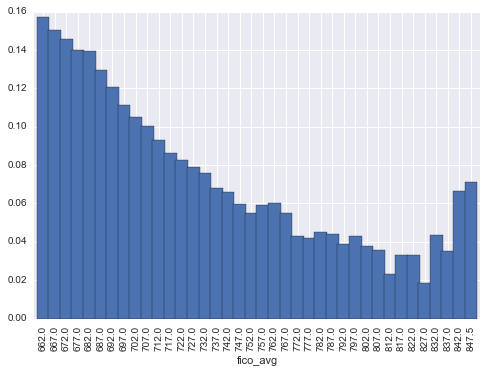

In [188]:
((df.groupby(["fico_avg"]).loan_label.apply(lambda x: pd.value_counts(x)/x.count().astype(float))).unstack()[1]).plot.bar(width=1.1)
#((df.groupby(["fico_avg"]).loan_label.apply(lambda x: pd.value_counts(x)/x.count().astype(float))).unstack()[1]).plot.bar()

In [511]:
correl = df.corr()
correl.loc[:,:] = np.tril(correl, k=-1)
correl = correl.stack()
#correl[(abs(correl) > 0.55)]


In [522]:
(abs(correl['loan_label']).sort_values(ascending=False))

int_rate                      0.198356
dti                           0.070245
inq_last_6mths                0.064877
mort_acc                      0.051363
annual_inc                    0.048505
earliest_cr_line              0.045294
revol_util                    0.035103
revol_bal                     0.028430
emp_length                    0.028119
delinq_2yrs                   0.013140
loan_amnt                     0.013116
open_acc                      0.011323
pub_rec                       0.006896
collections_12_mths_ex_med    0.004176
emp_title_flag                0.000000
loan_label                    0.000000
fico_avg                      0.000000
dtype: float64

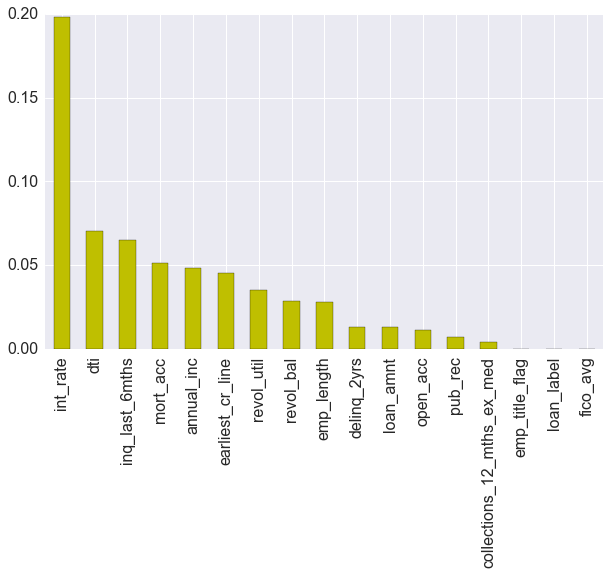

In [526]:
(abs(correl['loan_label']).sort_values(ascending=False)).plot(kind='bar', figsize=(10,6), color='y', fontsize=16)